# Demo Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Initial

In [2]:
# X: house prices
# Y: area
X = np.array([30, 40, 50, 60, 70, 80, 90, 100, 110, 120],dtype=np.float64)
Y = np.array([145, 213, 240, 320, 340, 420, 470, 510, 560, 600],dtype=np.float64)

# init data
w=5 # coefficient
b=0 # bias
lr= 1e-4 # learning rate
epochs = 1000 # epoch refers to one complete pass through the entire training dataset
avg_loss = [] # store the mean of loss in every epoch for visualization
n = len(X)

### Main

In [3]:
for epoch in range(epochs):
    loss_arr = [] # store the loss in each loop
    for i in range(n):
        x, y = X[i], Y[i]
        y_hat = w*x + b 

        # calculate and store loss
        delta_y = y_hat - y
        loss = delta_y**2/n
        loss_arr.append(loss)

        # update w and b
        dw = 2/n * x*delta_y
        db = 2/n * delta_y
        w = w - lr*dw
        b = b - lr*db
    avg_loss.append(np.mean(loss_arr))


### Visualizing

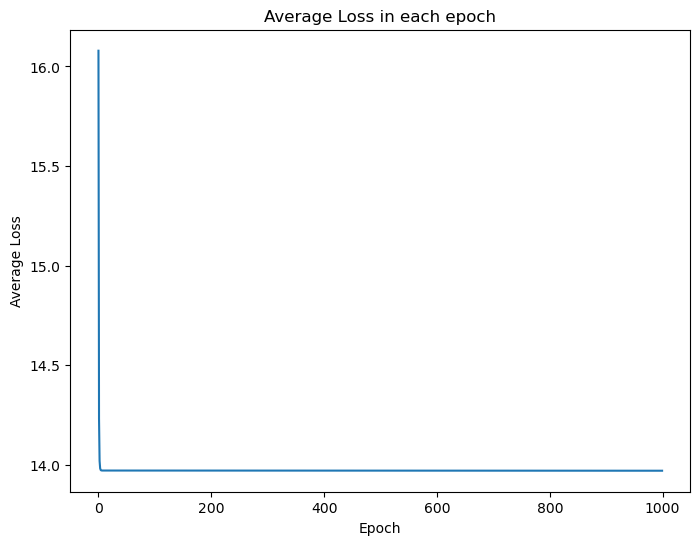

In [4]:
plt.figure(figsize=(8,6))
plt.plot(range(epochs),avg_loss)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Average Loss in each epoch')
plt.show()

In [5]:
print(f'Result: w= {w}, b= {b}, min loss= {min(avg_loss)}')

Result: w= 5.0719354825469924, b= 0.05786284862516597, min loss= 13.969937956915516


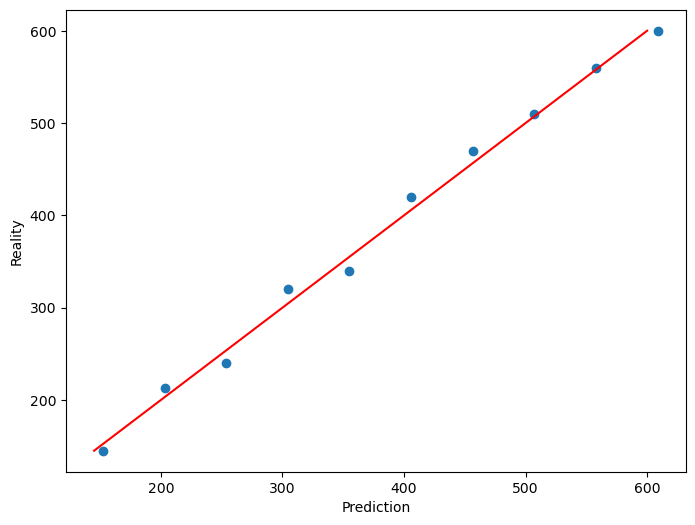

In [ ]:
y_pred = [w*x+b for x in X]
plt.figure(figsize=(8,6))
plt.scatter(y_pred,Y)
plt.plot(Y,Y,label='Perfect prediction line',color = 'red',label='Predicted vs Actual')
plt.xlabel('Prediction')
plt.ylabel('Reality')
plt.legend()
plt.grid(True)
plt.title('Prediction vs Reality')
plt.show()

### Gradient Descent Class Implement

In [ ]:
class GradientDescent:
    def __init__ (self,w0 = 0, b0 = 0, learning_rate = 1e-4, num_epochs = 1000):
        self.w = w0
        self.b = b0
        self.lr = learning_rate
        self.epoch = num_epochs
        self.X = None
        self.Y = None
        self.len = None
    
    def fit(self,X,Y):
        self.X = np.array(X, dtype=np.float64)
        self.Y = np.array(Y, dtype=np.float64)
        self.len = len(X)
        self.update()
    
    def update(self):
        for epoch in range(self.epoch):
            for i in range(self.len):
                x,y = self.X[i], self.Y[i]

                y_hat = self.w * x + self.b
                delta_y = y_hat - y
    
                dw = 2 * x * delta_y / self.len
                db = 2 * delta_y / self.len
                
                self.w -= self.lr*dw
                self.b -= self.lr*db

    def predict(self,X:np.ndarray):
        return [self.w * x + self.b for x in X]
    
    def get_params(self):
        return (self.w,self.b)
    
    def create_plot(self):
        y_predict = self.predict(self.X)
        plt.figure(figsize=(8,6))
        plt.scatter(y_predict,self.Y,label='Predicted vs Actual')
        plt.plot(self.Y,self.Y,label='Perfect prediction line',color = 'red')
        plt.xlabel('Prediction')
        plt.ylabel('Reality')
        plt.legend()
        plt.grid(True)
        plt.title('Prediction vs Reality')
        plt.show()

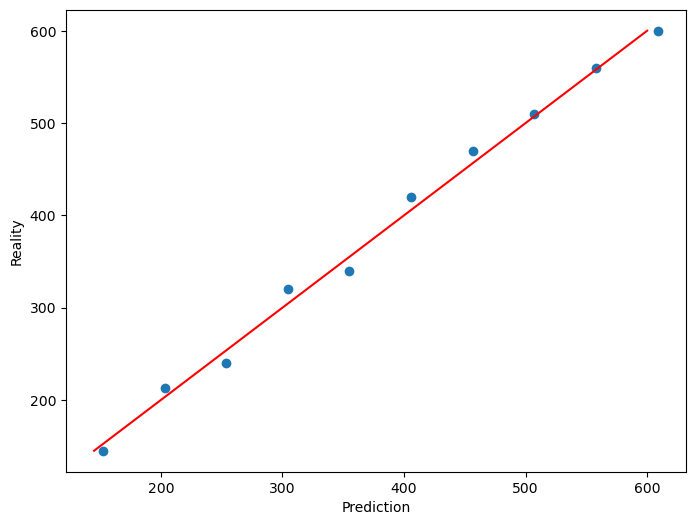

In [17]:
gb_model = GradientDescent()
gb_model.fit(X,Y)
gb_model.create_plot()